In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import os
import subprocess

import pylab as pl
%pylab inline

# make sure we are at the top of the repo
wd = subprocess.check_output('git rev-parse --show-toplevel', shell = True)
os.chdir(wd[:-1]) #-1 removes \n

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in cleaned data
df = gp.read_file('data/cb_dist/cb_dist.shp')
df.cb = df.cb.astype('int')
cb_rides = pd.read_csv('data/cb_rides.csv')
demo = pd.read_csv('data/demo.csv')

In [3]:
# merge dataset
df = df.merge(cb_rides, left_on = 'cb', right_on = 'BCTCB2010', )
#df = df.merge(demo, left_on = 'cb', right_on = 'geoid')

df.head()

,cb,dist_avg,geometry,BCTCB2010,n_rides
0,360610012001000,2.160815,"POLYGON ((989107.3262329118 200969.6084105199,...",360610012001000,15325
1,360610014011000,2.214438,"POLYGON ((987475.0164184577 200297.2178465645,...",360610014011000,18730
2,360610018001000,1.961016,"POLYGON ((987609.9440307622 200648.1850096448,...",360610018001000,18993
3,360610030021000,1.796426,"POLYGON ((988972.1099853517 202565.6482054396,...",360610030021000,27309
4,360610033001000,1.967044,"POLYGON ((983346.4652099599 201729.3476073014,...",360610033001000,22545


In [4]:
df['geoid'] = [str(i)[0:12] for i in df.cb ]

In [5]:
df2 = df.dissolve(by = 'geoid', as_index = False)

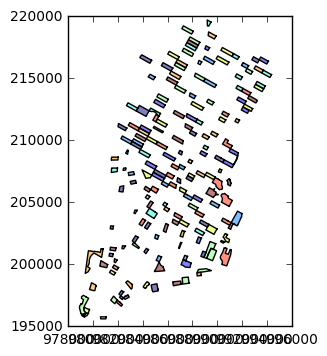

In [6]:
df.plot()

In [7]:
df2.head()
df2.geoid = df2.geoid.astype('int')

In [8]:
df3 = df2.merge(demo, on = 'geoid')

In [9]:
df3.head()

,geoid,geometry,cb,dist_avg,BCTCB2010,n_rides,pop,bike,commute_time,income_pc,no_vehicle_rent,no_vehicle_own
0,360610002021,"POLYGON ((988718.24560547 199114.4710203864, 9...",360610002021004,2.454123,360610002021004,13185,345,0,107,16017.0,89,29
1,360610006002,"POLYGON ((987096.1130371091 198401.6248289843,...",360610006002002,1.972577,360610006002002,10520,2532,0,1001,14986.0,762,0
2,360610006005,"POLYGON ((987737.7452392566 198484.652599982, ...",360610006005001,2.263913,360610006005001,12891,2111,0,652,11777.0,662,0
3,360610007001,"POLYGON ((982182.0942382803 196935.6336180423,...",360610007001002,2.733163,360610007001002,17031,6294,16,4652,101041.0,2615,423
4,360610009001,"POLYGON ((981040.2952270519 195769.9566160961,...",360610009001026,2.790164,360610009001026,10086,613,0,423,92940.0,165,19


In [12]:
import statsmodels.formula.api as smf

lm = smf.ols('n_rides ~ dist_avg', data = df3).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_rides   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     9.622
Date:                Sun, 04 Dec 2016   Prob (F-statistic):            0.00229
Time:                        18:05:24   Log-Likelihood:                -1687.4
No. Observations:                 153   AIC:                             3379.
Df Residuals:                     151   BIC:                             3385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.498e+04   4790.629      9.389      0.000      3.55e+04  5.44e+04
dist_avg   -8903.1417   2870.125     -3.102      0.002     -1.46e+04 -3232.351
==============================================================================
Omnibus:                       52.651   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.812
Skew:                           1.466   Prob(JB):                     1.30e-27
Kurtosis:                       6.290   Cond. No.                         8.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""